In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_intrusion
import pandas as pd 
import numpy as np

In [2]:
data, bb = load_intrusion()

### Modelling faults using structural frames
Standard implicit modelling techniques either treat faults as domain boundaries or use a step function in the implicit function to capture the displacement in the faulted surface.

Adding faults into the implicit function using step functions is limited because this does not capture the kinematics of the fault. It effectively defines the fault displacement by adding a value to the scalar field on the hanging wall of the fault. 

LoopStructural applies structural frames to the fault geometry to capture the geometry and kinematics of the fault. A fault frame consisting of the fault surface, fault slip direction and fault extent are built from observations. The geometry of the deformed surface is then interpolated by first restoring the observations by combining the fault frame and an expected displacement model. 

In [53]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)

model.create_and_add_foliation('strati',nelements=100000,interpolatortype='PLI',cgw=0.03)
model.create_and_add_fault('fault',500,nelements=10000,steps=4,interpolatortype='FDI')


{'feature': <LoopStructural.modelling.fault.fault_segment.FaultSegment at 0x7fca9ec2c908>}


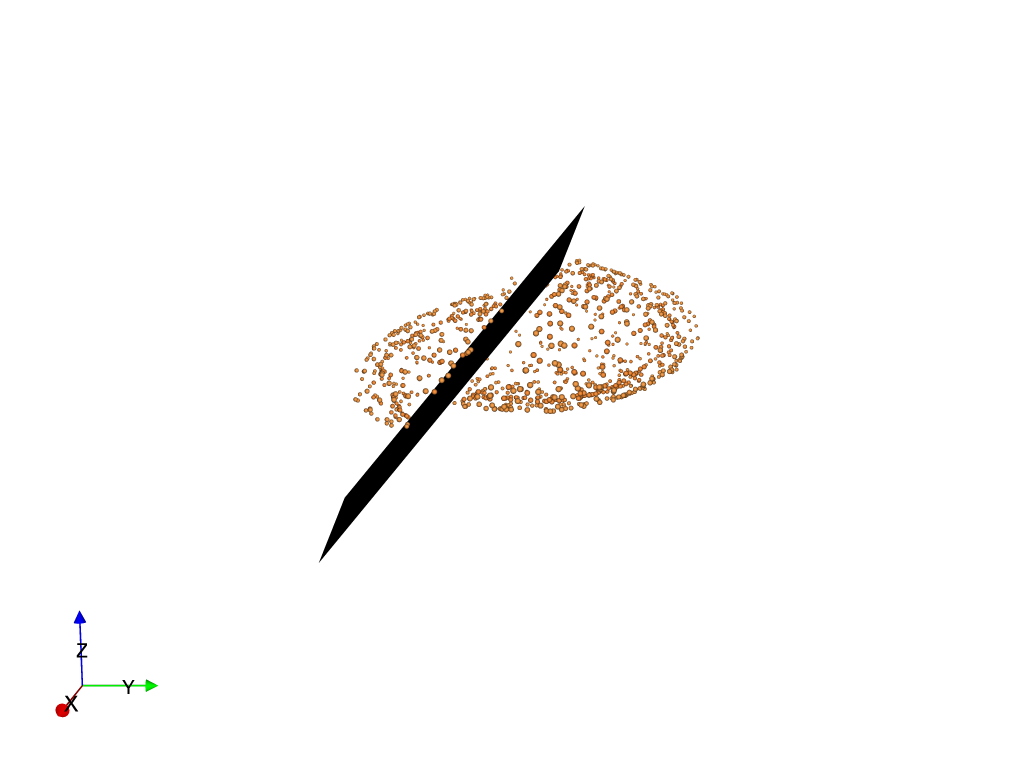

In [54]:
viewer = LavaVuModelViewer()
viewer.add_isosurface(model.features[1],
                     voxet=model.voxet(),
                      isovalue=0,
                      colour='black'
#                       slices=[0,1]#nslices=10
                      
                     )
# viewer.add_isosurface(model.features[1],
#                      voxet=model.voxet(),
#                      isovalue=0)
# # viewer.add_data(model.features[0][0])
viewer.add_data(model.features[0])
# viewer.add_points(model.data[model.data['type']=='strati'][['X','Y','Z']],name='prefault',pointsize=5,colour='blue')
viewer.lv['border'] = 0
viewer.lv.rotatey(-75)
viewer.lv.rotatez(-30)
# viewer.lv.rotate([-30.713947296142578, -86.09600067138672, -123.54869842529297])
viewer.lv.display()


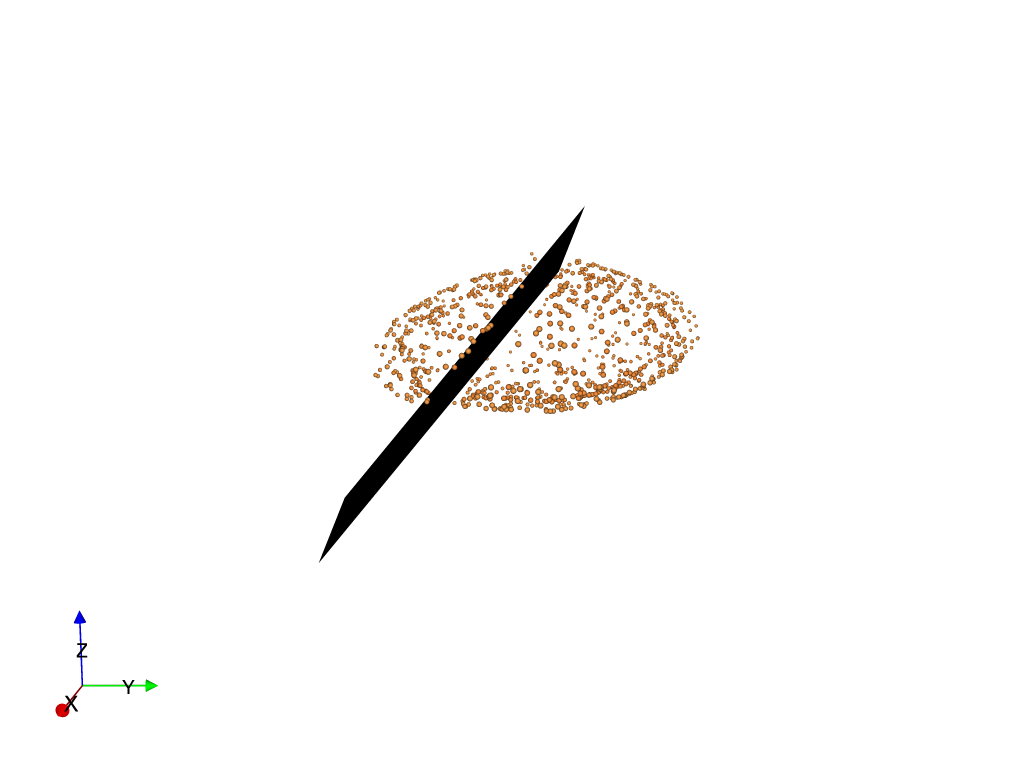

In [44]:
viewer = LavaVuModelViewer()
viewer.add_isosurface(model.features[0],
                     voxet=model.voxet(),
                      isovalue=0,
                      colour='black'
#                       slices=[0,1]#nslices=10
                      
                     )
# viewer.add_isosurface(model.features[1],
#                      voxet=model.voxet(),
#                      isovalue=0)
# viewer.add_data(model.features[0][0])
viewer.add_data(model.features[-1])
# viewer.add_points(model.data[model.data['type']=='strati'][['X','Y','Z']],name='prefault',pointsize=5,colour='blue')
viewer.lv['border'] = 0
viewer.lv.rotatey(-75)
viewer.lv.rotatez(-30)
# viewer.lv.rotate([-30.713947296142578, -86.09600067138672, -123.54869842529297])
viewer.lv.display()


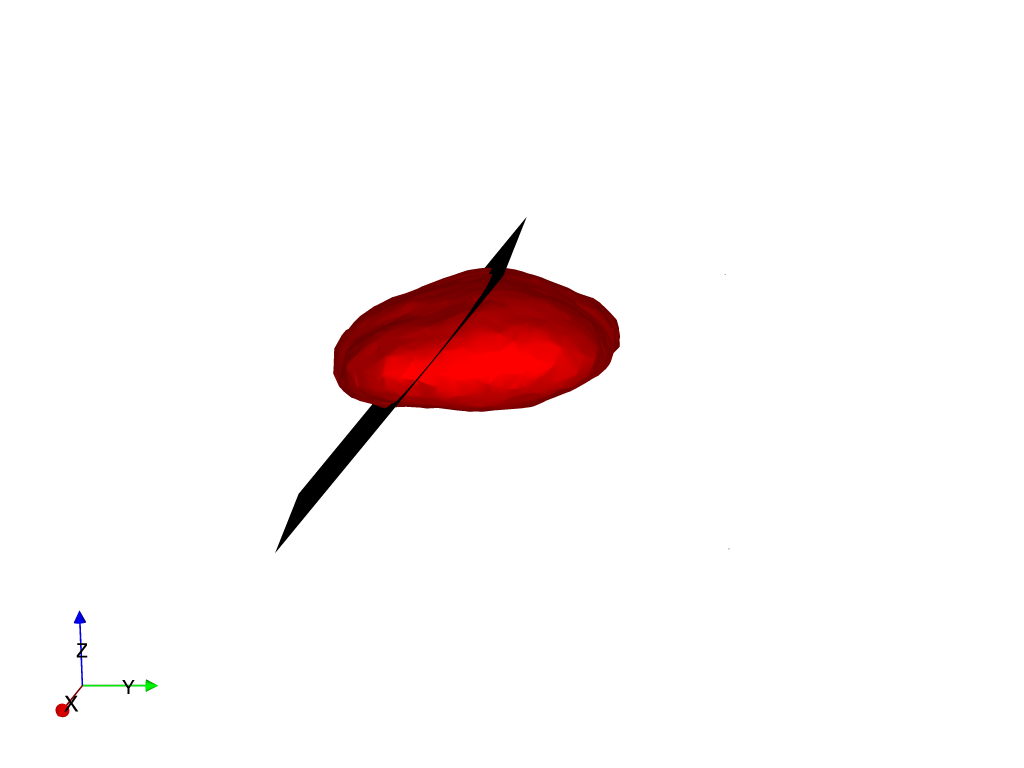

In [40]:
viewer = LavaVuModelViewer()
viewer.add_isosurface(model.features[0],
#                      voxet=model.voxet(),
                      isovalue=0,
                      colour='black'
#                       slices=[0,1]#nslices=10
                      
                     )
viewer.add_isosurface(model.features[1],
#                      voxet=model.voxet(),
                     isovalue=0)
# viewer.add_data(model.features[0][0])
# viewer.add_data(model.features[-1])
# viewer.add_points(model.data[model.data['type']=='strati'][['X','Y','Z']],name='prefault',pointsize=5,colour='blue')
viewer.lv['border'] = 0
viewer.lv.rotatey(-75)
viewer.lv.rotatez(-30)
# viewer.lv.rotate([-30.713947296142578, -86.09600067138672, -123.54869842529297])
viewer.lv.display()


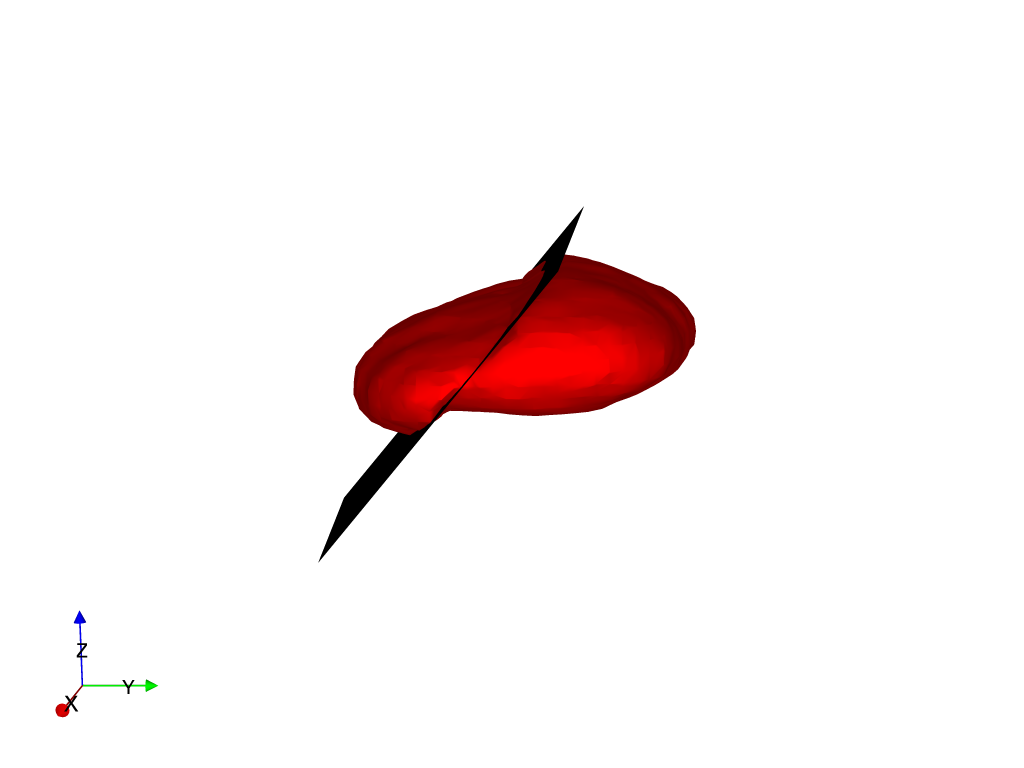

In [50]:
viewer = LavaVuModelViewer()
viewer.add_isosurface(model.features[0],
                     voxet=model.voxet(),
                      isovalue=0,
                      colour='black'
#                       slices=[0,1]#nslices=10
                      
                     )
viewer.add_isosurface(model.features[1],
                     voxet=model.voxet(),
                     isovalue=0)
# viewer.add_data(model.features[0][0])
# viewer.add_data(model.features[-1])
# viewer.add_points(model.data[model.data['type']=='strati'][['X','Y','Z']],name='prefault',pointsize=5,colour='blue')
viewer.lv['border'] = 0
viewer.lv.rotatey(-75)
viewer.lv.rotatez(-30)
# viewer.lv.rotate([-30.713947296142578, -86.09600067138672, -123.54869842529297])
viewer.lv.display()

In [51]:
with viewer.lv.video('intrusion_rotate.mp4'):
    for i in range(360):
        viewer.lv.rotatey(1)
        viewer.lv.render()

Recording complete, filename:  intrusion_rotate.mp4
